In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
from dataset import LayoutDataset
from models import LayoutMLP
from scipy.stats import kendalltau

2023-09-23 22:23:26.392406: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-09-23 22:23:27.199054: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
batch_size = 128
dataset = LayoutDataset(batch_size, train_sample_fraction=0.35, subset='xla')

2023-09-23 22:23:28.267868: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 22:23:28.292712: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-09-23 22:23:28.292894: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

['predict-ai-model-runtime', 'npz_all', 'npz', 'layout', 'xla', 'default', 'train']
['predict-ai-model-runtime', 'npz_all', 'npz', 'layout', 'xla', 'random', 'train']


loading train: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 46/46 [00:21<00:00,  2.18it/s]


permutating 10810 training samples
creating training tf.data.Dataset


2023-09-23 22:23:50.495538: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1478808000 exceeds 10% of free system memory.


['predict-ai-model-runtime', 'npz_all', 'npz', 'layout', 'xla', 'default', 'test']
['predict-ai-model-runtime', 'npz_all', 'npz', 'layout', 'xla', 'random', 'test']


loading test: 100%|███████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 16/16 [00:03<00:00,  4.42it/s]


creating test tf.data.Dataset


2023-09-23 22:23:55.471591: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 2188936800 exceeds 10% of free system memory.


['predict-ai-model-runtime', 'npz_all', 'npz', 'layout', 'xla', 'default', 'valid']
['predict-ai-model-runtime', 'npz_all', 'npz', 'layout', 'xla', 'random', 'valid']


loading valid: 100%|██████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 14/14 [00:06<00:00,  2.07it/s]


creating validation tf.data.Dataset


In [3]:
mlp = LayoutMLP(batch_size, learning_rate=1e-3, mask_max_len=300)

In [4]:
mlp.train(dataset.train_data, dataset.valid_data)

2023-09-23 22:24:03.667289: W tensorflow/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 1478808000 exceeds 10% of free system memory.
2023-09-23 22:24:08.241554: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:606] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-09-23 22:24:08.255920: I tensorflow/compiler/xla/service/service.cc:168] XLA service 0x7f267f618670 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-09-23 22:24:08.255934: I tensorflow/compiler/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Laptop GPU, Compute Capability 8.6
2023-09-23 22:24:08.284419: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:255] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-09-23 22:24:08.453340: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:432] Loaded cuDNN version 8600
2023-09-23 22:

iteration 100 training loss 0.83158636 lr 0.00100
iteration 200 training loss 0.4550414 lr 0.00100
iteration 300 training loss 0.45061362 lr 0.00100
iteration 400 training loss 0.32444167 lr 0.00100
iteration 500 training loss 0.33402464 lr 0.00100
iteration 600 training loss 0.26943427 lr 0.00100
iteration 700 training loss 0.3115614 lr 0.00100
iteration 800 training loss 0.31675 lr 0.00100
iteration 900 training loss 0.29235128 lr 0.00100
iteration 1000 training loss 0.20379181 lr 0.00100
epoch 11, it 1000 validation loss 0.011
iteration 1100 training loss 0.24377604 lr 0.00090
iteration 1200 training loss 0.21169809 lr 0.00090
iteration 1300 training loss 0.20913444 lr 0.00090
iteration 1400 training loss 0.19569555 lr 0.00090
iteration 1500 training loss 0.19304559 lr 0.00090
iteration 1600 training loss 0.21033347 lr 0.00090
iteration 1700 training loss 0.23197901 lr 0.00090
iteration 1800 training loss 0.17189741 lr 0.00090
iteration 1900 training loss 0.19625175 lr 0.00090
itera

KeyboardInterrupt: 

In [ ]:
mlp.normalization_layer_config_nodes.mean.numpy().flatten()

In [ ]:
plt.hist(mlp.dense_layer_3.kernel.numpy().flatten(), bins=50);

In [ ]:
for tile_ids, config_indexes, config_descriptors, valid_mask, graph_descriptor, normalized_runtimes in dataset.train_data:
    break

In [ ]:
np.unique(tile_ids.numpy())

In [ ]:
config_descriptors.numpy()[5, 0, :]

In [ ]:
config_descriptors

In [ ]:
import tensorflow as tf

In [ ]:
x = mlp.normalization_layer_config_nodes(config_descriptors)
x = mlp.dense_layer_1(x)
x = mlp.relu_layer(x)  # (batch_size, n_config_nodes_upper_limit, n_units)

float_mask = tf.cast(valid_mask, tf.float32)  # (batch_size, n_config_nodes_upper_limit)
float_mask = tf.expand_dims(float_mask, axis=-1)
x = x * float_mask
x = tf.reduce_mean(x, axis=1)

normal_graph_descriptor = mlp.normalization_layer_graph_descriptor(graph_descriptor)
x = tf.concat([x, normal_graph_descriptor], axis=-1)
x = mlp.dense_layer_2(x)
x = mlp.relu_layer(x)
x = mlp.dense_layer_3(x)
x = tf.reshape(x, (-1,))
x

In [ ]:
order = np.random.permutation(np.arange(10))
new_order = order.copy()
new_order[0] = order[1]
new_order[1] = order[0]
kendalltau(order, new_order)

## Evaluate validation set

In [5]:
val_df = mlp.predict_over_dataset(dataset.valid_data, return_labels=True)

In [6]:
val_df[['prediction', 'target']].describe()

,prediction,target
count,3500.000000,3500.000000
mean,0.335487,0.123730
std,0.408646,0.170083
min,-0.127831,0.000000
25%,0.151892,0.000248
50%,0.207446,0.022546
75%,0.301126,0.212276
max,1.412560,0.673752


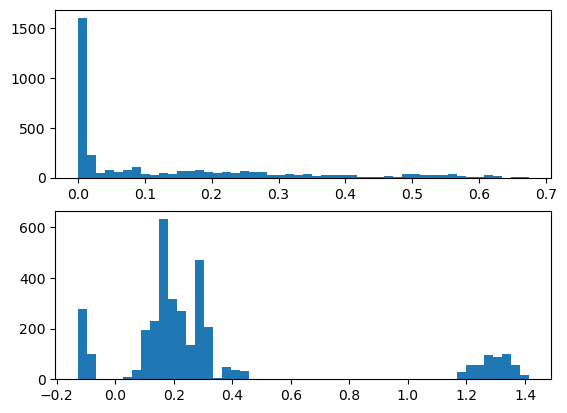

In [7]:
plt.subplot(2, 1, 1)
plt.hist(val_df['target'], bins=50)
plt.subplot(2, 1, 2)
plt.hist(val_df['prediction'], bins=50);

In [8]:
val_df.ID.unique()

array([b'layout:xla:default:mlperf_bert_batch_24_2x2',
       b'layout:xla:default:bert_pretraining.4x4.fp16',
       b'layout:xla:default:inception_v3_batch_128_train',
       b'layout:xla:default:resnet50.4x4.fp16',
       b'layout:xla:default:resnet_v1_50_official_batch_128_bf16',
       b'layout:xla:default:tf2_bert_pretrain_dynamic_batch_size',
       b'layout:xla:default:unet_3d.4x4.bf16',
       b'layout:xla:random:mlperf_bert_batch_24_2x2',
       b'layout:xla:random:bert_pretraining.4x4.fp16',
       b'layout:xla:random:inception_v3_batch_128_train',
       b'layout:xla:random:resnet50.4x4.fp16',
       b'layout:xla:random:resnet_v1_50_official_batch_128_bf16',
       b'layout:xla:random:tf2_bert_pretrain_dynamic_batch_size',
       b'layout:xla:random:unet_3d.4x4.bf16'], dtype=object)

Text(0.5, 1.0, "b'layout:xla:random:inception_v3_batch_128_train'")

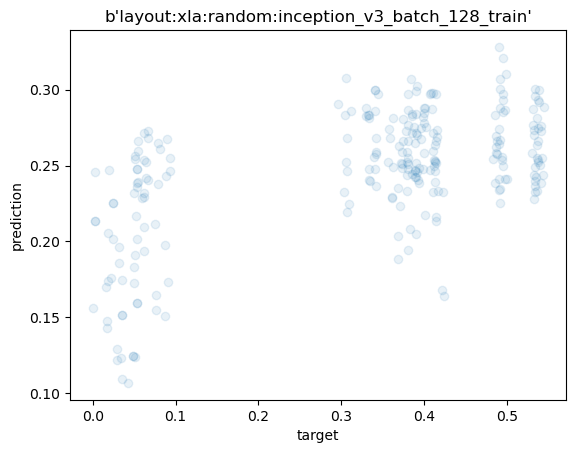

In [46]:
x_lin = np.linspace(0, 1, 100)
#plt.plot(x_lin, x_lin, color='orange')

random_sample = val_df.sample(2_000)
graph_id = np.random.choice(val_df['ID'].unique())
random_sample = val_df[val_df['ID'] == graph_id]

plt.scatter(
    random_sample.target,
    np.clip(random_sample.prediction, a_min=-10.0, a_max=25.0),
    alpha=0.1,
    #c=random_sample['ID'].apply(lambda x: x.decode('UTF-8').split(':')[1] == 'xla').values.astype(float)
)
plt.xlabel('target')
plt.ylabel('prediction')
plt.title(graph_id)
#plt.colorbar()

In [ ]:
random_sample = val_df.sample(5_000)

plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.scatter(
    random_sample['target'],
    np.abs(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('abs error')
x_lin = np.linspace(0, 0.7, 100)
plt.plot(x_lin, x_lin, color='orange')


plt.subplot(1, 2, 2)
plt.scatter(
    random_sample['target'],
    np.square(random_sample['target'] - random_sample['prediction']),
    alpha=0.07
)
plt.xlabel('target')
plt.ylabel('squared error')

In [ ]:
def sort_configs(df):
    top = df.sort_values('prediction')
    top = top['config_index'].values.tolist()
    top = [str(i) for i in top]
    return ';'.join(top)

val_prediction = val_df.groupby('ID').apply(sort_configs)
val_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
val_prediction

In [ ]:
def layout_score(candidate_order, layout_dict):
    runtimes = layout_dict['config_runtime']
    best_ranking = np.argsort(runtimes)
    assert len(candidate_order) == len(runtimes)
    score, _ = kendalltau(candidate_order, best_ranking)
    return score

In [ ]:
dirpath, filename

In [ ]:
true_order = np.argsort(layout_dict['config_runtime'])
plt.scatter(true_order, candidate_order)

In [ ]:
layout_set = 'valid'
true_orders = []
layout_ids = []
for dirpath, dirnames, filenames in os.walk('predict-ai-model-runtime/npz_all/npz/layout'):
    if len(filenames) == 0:
        continue
    
    if dirpath.split('/')[-1] != layout_set:
        continue
        
    layout_id_prefix = ':'.join(dirpath.split('/')[-4:-1])
    for filename in os.listdir(dirpath):
        print(filename)
        layout_id = layout_id_prefix+':'+filename[:-4]
        layout_dict = dict(np.load(os.path.join(dirpath, filename)))
        runtimes = layout_dict['config_runtime']
        best_ranking = np.argsort(runtimes)
        best_ranking = ';'.join([str(i) for i in best_ranking])
        true_orders.append(best_ranking)
        layout_ids.append(layout_id)
        
true_order_df = pd.DataFrame(
    data=np.stack([layout_ids, true_orders], axis=-1),
    columns=['ID', 'true_order']
)
true_order_df

In [ ]:
# layout_id = true_order_df.sample()['ID'].values[0]
layout_id = 'layout:xla:default:resnet50.4x4.fp16'
true_order = [int(i) for i in true_order_df[true_order_df['ID'] == layout_id]['true_order'].values[0].split(';')]
candidate_order = [int(i) for i in val_prediction[layout_id].split(';')]

plt.scatter(true_order, candidate_order)
plt.xlabel('true order')
plt.ylabel('candidate order')
plt.title(f'{layout_id}, len {len(true_order)}')

In [ ]:
layout_dict = dict(np.load('predict-ai-model-runtime/npz_all/npz/layout/nlp/default/valid/small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train.npz'))
layout_dict['node_config_feat'].shape

In [ ]:
val_df[val_df['ID'] == b'layout:nlp:default:small_bert_bert_en_uncased_L-6_H-256_A-4_batch_size_16_train']

In [ ]:
evaluation_result_layout['score'].astype(float).mean()

## Inference over test set

In [ ]:
test_df = mlp.predict_over_dataset(dataset.test_data, return_labels=False)
test_df

In [ ]:
test_prediction = test_df.groupby('ID').apply(sort_configs)
test_prediction.rename(index=lambda x: x.decode('UTF-8'), inplace=True)
test_prediction

In [ ]:
pd.DataFrame(test_prediction, columns=['TopConfigs']).to_csv('layout_test_prediction.csv')

In [ ]:
plt.hist(np.abs(mlp.dense_layer_1.kernel.numpy().flatten()), bins=50)